# Recurrent Neural Networks

In [1]:
# ==========================================================¶
# Date : 13 dec. 2018
# MS Valdom > apprenants > omar attaf, laurent lapasset, didier le picaut
# version = 1.0
# ==========================================================

In [2]:
#================
# objectif : Réseaux de neurones récurrents
#================

In [3]:
# Comment formons-nous un RNN?
# ----------------------
# la retropropagation à travers le temps > nous considérons une version non déroulée du NN.

In [4]:
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [5]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Debut du decompte du temps
import time
start_time = time.time()

In [7]:
SEED = 1

# cuda est tu la ?
cuda = torch.cuda.is_available()

# reproductibilite
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

In [8]:
# Créez un DataSet personnalisé, qui retourne:
# ----------------------    
x = np.array (range (1000)) + np.random.randint (-100, 100, 1)
y = np.sin (x / 50.). astype ('float32')

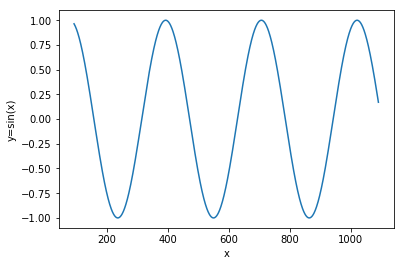

In [9]:
# courbe y=sin(x):
# ---------------------- 
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y=sin(x)')
plt.show()

In [10]:
# hyperparamètres du modèle
# ----------------------  
dtype = torch.FloatTensor
input_size = 7      # taille de la couche d’entrée
hidden_size = 6     # 6+1=7
output_size = 1     # sortie ychap
epochs = 200        # nn Epochs
seq_length = 200    # longueur séquence d’entrée et cible.
lr = 0.05           # learming rate

In [11]:
# data train, où x = séquence d'entrée et y = séquence cible.
# ---------------------- 
data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

In [12]:
# matrice des poids des neurones w1, w2
# ---------------------- 

w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
init.normal(w1, 0.0, 0.4)
w1 =  Variable(w1, requires_grad=True)

w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad=True)

In [13]:
# méthode forward (passe avant)
# ---------------------- 
def forward(input, context_state, w1, w2):
  xh = torch.cat((input, context_state), 1)
  context_state = torch.tanh(xh.mm(w1))
  out = context_state.mm(w2)
  return  (out, context_state)

In [14]:
# méthode forward
# ---------------------- 
# arguments : vecteur entree context_state 2 mat poids
# vecteur xh en concaténant vecteur d’entrée avec vecteur context_state. 
# produit scalaire entre vecteur xh et w1, 
# tanh comme non-linéarité (mieux avec les RNN)
# produit scalaire contexte_state et w2.
# sortie context_state comme entree au prochain pas de temps.

In [15]:
# modele RNN
# ---------------------- 
for i in range(epochs):
  total_loss = 0
  context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=True)
    
  for j in range(x.size(0)):
    input = x[j:(j+1)]
    target = y[j:(j+1)]
    (pred, context_state) = forward(input, context_state, w1, w2)
    loss = (pred - target).pow(2).sum()/2
    total_loss += loss
    loss.backward()
    w1.data -= lr * w1.grad.data
    w2.data -= lr * w2.grad.data
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    context_state = Variable(context_state.data)
    
  if i % 10 == 0:
     print("Epoch: {} loss {}".format(i, total_loss.data[0]))


context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []



Epoch: 0 loss 0.7782846093177795
Epoch: 10 loss 0.20200496912002563
Epoch: 20 loss 0.1194792240858078
Epoch: 30 loss 0.09432721138000488
Epoch: 40 loss 0.08505037426948547
Epoch: 50 loss 0.08072900772094727
Epoch: 60 loss 0.07795462757349014
Epoch: 70 loss 0.07566829770803452
Epoch: 80 loss 0.0735776498913765
Epoch: 90 loss 0.07162196934223175
Epoch: 100 loss 0.06979773193597794
Epoch: 110 loss 0.06810740381479263
Epoch: 120 loss 0.06654886156320572
Epoch: 130 loss 0.06511545181274414
Epoch: 140 loss 0.06379733234643936
Epoch: 150 loss 0.06258402019739151
Epoch: 160 loss 0.06146439164876938
Epoch: 170 loss 0.060427818447351456
Epoch: 180 loss 0.059464916586875916
Epoch: 190 loss 0.058566708117723465


In [16]:
# modele RNN = le train
# ---------------------- 
# La boucle externe itère sur Epoch 
# Au début de chaque Epoch, initialiser context_state avec des zéros.
# La boucle interne parcourt chaque élément de la séquence.
# Nous exécutons la méthode forward qui renvoie la prédiction
# et le contexte_state qui seront utilisés pour la prochaine étape temporelle. 
# Ensuite, nous calculons l’erreur quadratique moyenne (MSE), 
# En backward sur la perte, on calcule les gradients, puis maj poids. 
# effacer les gradients à chaque itération en appelant la méthode zero_ (), sinon les gradients accumulés. 
# envelopper le vecteur context_state dans la nouvelle variable, pour le détacher de son historique.

In [17]:
# faire la prediction
# ---------------------- 
for i in range(x.size(0)):
  input = x[i:i+1]
  (pred, context_state) = forward(input, context_state, w1, w2)
  context_state = context_state
  predictions.append(pred.data.numpy().ravel()[0])

In [18]:
# faire la prediction
# ---------------------- 
# À chaque étape de la séquence, alimenter le modèle avec un seul point de données (cf courbe)
# et prédire une valeur au prochain pas de temps.

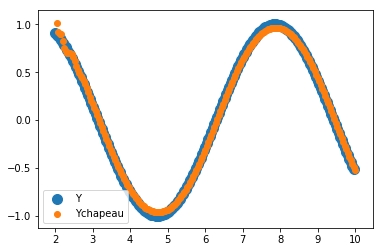

In [19]:
# visualiser le Y et Ychapeau
# ----------------------  
pl.scatter(data_time_steps[:-1], x.data.numpy(), s=100, label="Y")
pl.scatter(data_time_steps[1:], predictions, label="Ychapeau")
pl.legend()
pl.show()

In [20]:
# analyse : 
# ---------------------- 
# avec epochs = 200 et seq_length = 200, Ychapeau predit bien la vrai valeur Y=sin(x)
# plus on augmente seq_length et + on nourrit en nb d Epochs meilleure sera la prediction

In [21]:
# Affichage du temps d execution
print("Temps d execution : %s minutes --- secondes" % round((time.time() - start_time)/60),2)

Temps d execution : 0 minutes --- secondes 2
